# First Simple Model
Borrowing heavily from https://www.tensorflow.org/tutorials/images/classification to start

## Imports

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Model

In [39]:
# Set variables for ease of manipulation

data_path = os.getcwd() + '\\PokeImages-by-type'
batch_size = 64
img_height = 256
img_width = 256

### Train / Test Split

In [40]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="training",
  seed=52,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33877 files belonging to 17 classes.
Using 27102 files for training.


In [41]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  seed=52,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 33877 files belonging to 17 classes.
Using 6775 files for validation.


In [42]:
class_names = train_ds.class_names

In [43]:
class_names

['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

### Tune for performance
Following tutorial, need to investigate further

In [44]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### The Model

In [45]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 128, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 64, 64)       

In [48]:
epochs=10
start = time.time()

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

end = time.time()
elapsed = end - start
print(elapsed, ' seconds')

Epoch 1/10
424/424 [==============================] - 91s 148ms/step - loss: 2.2459 - accuracy: 0.3061 - val_loss: 1.6874 - val_accuracy: 0.5018
Epoch 2/10
424/424 [==============================] - 84s 197ms/step - loss: 1.0365 - accuracy: 0.6992 - val_loss: 0.8663 - val_accuracy: 0.7690
Epoch 3/10
424/424 [==============================] - 86s 202ms/step - loss: 0.3016 - accuracy: 0.9117 - val_loss: 0.7341 - val_accuracy: 0.8431
Epoch 4/10
424/424 [==============================] - 85s 201ms/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.8126 - val_accuracy: 0.8582
Epoch 5/10
424/424 [==============================] - 83s 196ms/step - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.9032 - val_accuracy: 0.8644
Epoch 6/10
424/424 [==============================] - 90s 213ms/step - loss: 0.0522 - accuracy: 0.9834 - val_loss: 0.9858 - val_accuracy: 0.8688
Epoch 7/10
424/424 [==============================] - 92s 219ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 1.0978 - val_ac

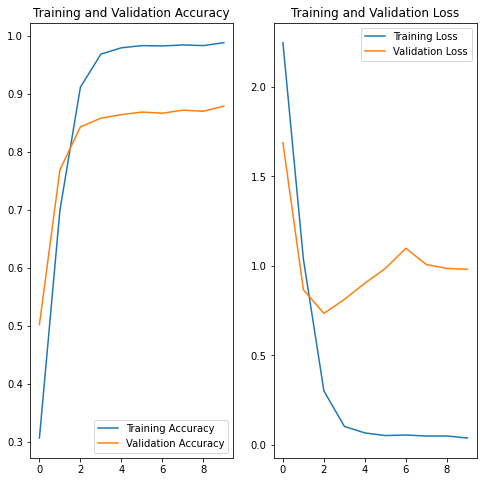

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()